In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.getcwd()[:-8]+'/Analysis_Funcs/LC_Sim/')
sys.path.append(os.getcwd()[:-8]+'/Analysis_Funcs/General')
from fitsloader import XMMtolc
from astropy.io import fits
from CurveFit import GaussCurve
from astropy.modeling.models import Const1D
from stingray.modeling import GaussianLogLikelihood, ParameterEstimation

/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/utils.py:24: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(


display the observation

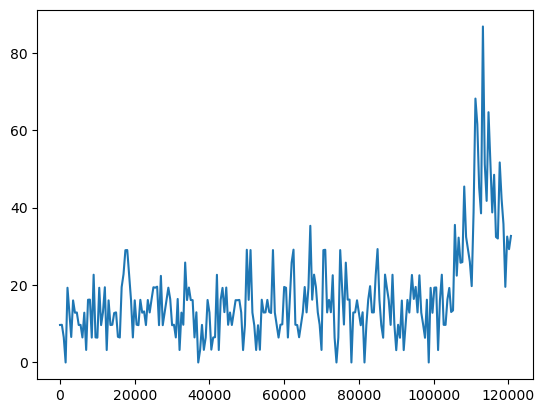

In [2]:
lc = XMMtolc('obs/0604860301_.2-2.0_t50_pn.lc',t_bin=50).rebin(500)
t0 = lc.time[0]
lc = lc.shift(-t0)
lc.plot()

Look at the flare

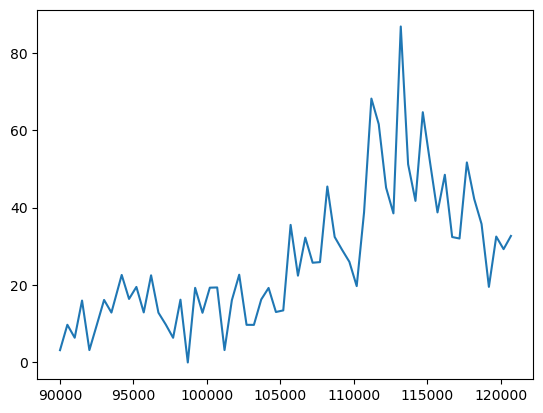

In [3]:
lc_flare = lc.truncate(start=90000,method='time')
lc_flare.plot()

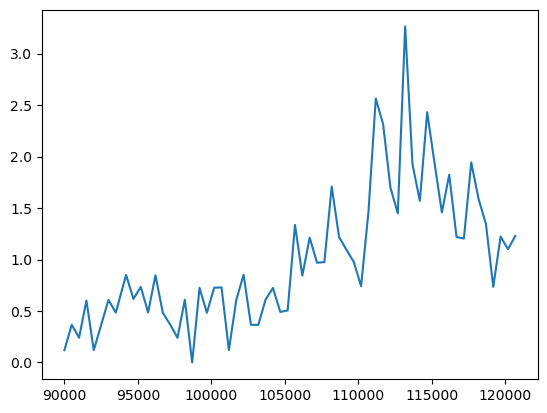

In [4]:
plt.plot(lc_flare.time,lc_flare.countrate/lc_flare.meanrate)

Model flare and determine the peak time, height and width

         Current function value: 251.484734
         Iterations: 60
         Function evaluations: 415
         Gradient evaluations: 83


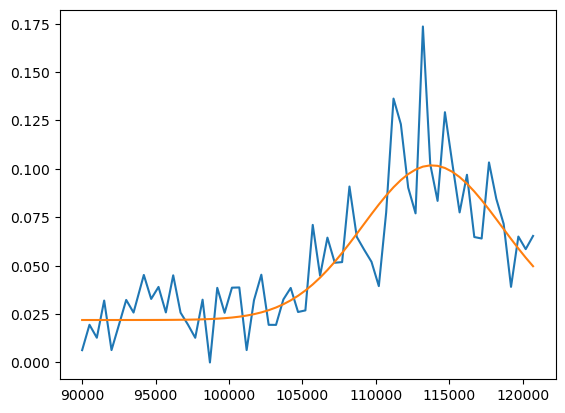

In [5]:
model = Const1D() + GaussCurve()
start_pars = [5,25,20000,115000]
loglike = GaussianLogLikelihood(lc_flare.time,lc_flare.counts,lc_flare.counts_err,model)
parest = ParameterEstimation(fitmethod='BFGS', max_post=False)
res = parest.fit(loglike,start_pars,scipy_optimize_options={'options':{'maxiter':100000,'gtol':1e-10,'disp':True}})
#res.print_summary(loglike)
res.mfit /= lc_flare.dt
#pdb.set_trace()
fig, ax = plt.subplots()
plt.plot(lc_flare.time,lc_flare.countrate)
plt.plot(lc_flare.time,res.mfit)
plt.show()

In [6]:
print('Quiescent Rate: ',model.parameters[0]/lc_flare.dt)
print('Eruption Height: ',model.parameters[1]/lc_flare.dt)
print('Flare Duration (FWHM): ',model.parameters[2])
print('Flare Peak Position: ',model.parameters[3])

Quiescent Rate:  0.021939793347467686
Eruption Height:  0.0799051603630269
Flare Duration (FWHM):  11149.189127779968
Flare Peak Position:  113818.13852261398


Energy band comparisons for flare

In [7]:
band1 = XMMtolc('obs/0604860301_.2-.5_t50_pn.lc',t_bin=50).rebin(1000).shift(-t0)
band2 = XMMtolc('obs/0604860301_.5-1.0_t50_pn.lc',t_bin=50).rebin(1000).shift(-t0)
band3 = XMMtolc('obs/0604860301_1.0-2.0_t50_pn.lc',t_bin=50).rebin(1000).shift(-t0)

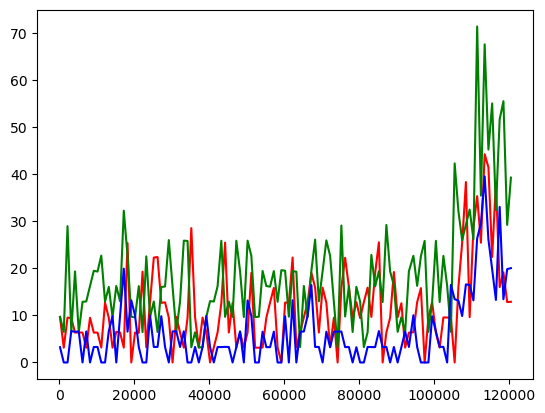

In [8]:
plt.plot(band1.time,band1.counts,color='r')
plt.plot(band2.time,band2.counts,color='g')
plt.plot(band3.time,band3.counts,color='b')

...and zoom in to the flare

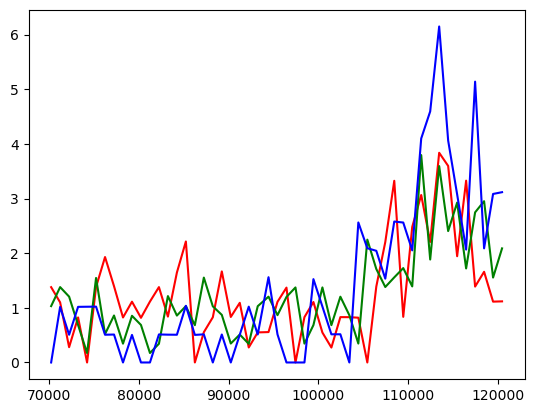

In [9]:
band1_flare = band1.truncate(start=70000,method='time')
band2_flare = band2.truncate(start=70000,method='time')
band3_flare = band3.truncate(start=70000,method='time')
plt.plot(band1_flare.time,band1_flare.counts/band1.meancounts,color='r')
plt.plot(band2_flare.time,band2_flare.counts/band2.meancounts,color='g')
plt.plot(band3_flare.time,band3_flare.counts/band3.meancounts,color='b')

and now model those flares

Optimization terminated successfully.
         Current function value: 10000000000000000.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1
Quiescent Rate:  0.009801657431852856
Eruption Height:  0.03040951421742039
Flare Duration (FWHM):  10020.203258158012
Flare Peak Position:  113007.61472190559


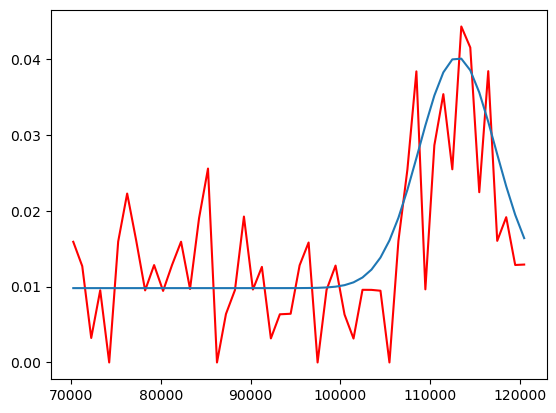

In [15]:
model1 = Const1D() + GaussCurve()
start_pars1 = [10,30,10000,113000]
loglike1 = GaussianLogLikelihood(band1_flare.time,band1_flare.counts,band1_flare.counts_err,model1)
parest1 = ParameterEstimation(fitmethod='BFGS', max_post=False)
res1 = parest1.fit(loglike1,start_pars1,scipy_optimize_options={'options':{'maxiter':100000,'gtol':1e-10,'disp':True}})
res1.mfit /= band1_flare.dt
print('Quiescent Rate: ',model1.parameters[0]/band1_flare.dt)
print('Eruption Height: ',model1.parameters[1]/band1_flare.dt)
print('Flare Duration (FWHM): ',model1.parameters[2])
print('Flare Peak Position: ',model1.parameters[3])
plt.plot(band1_flare.time,band1_flare.countrate,color='r')
plt.plot(band1_flare.time,res1.mfit)
plt.show()


         Current function value: 221.364842
         Iterations: 70
         Function evaluations: 682
         Gradient evaluations: 134
Quiescent Rate:  0.012145231866951423
Eruption Height:  0.03949819668957214
Flare Duration (FWHM):  11650.256869134146
Flare Peak Position:  114901.99822317575


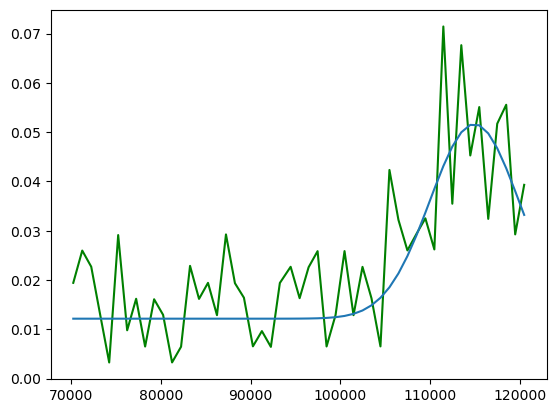

In [11]:
model2 = Const1D() + GaussCurve()
start_pars2 = [15,45,20000,115000]
loglike2 = GaussianLogLikelihood(band2_flare.time,band2_flare.counts,band2_flare.counts_err,model2)
parest2 = ParameterEstimation(fitmethod='BFGS', max_post=False)
res2 = parest2.fit(loglike2,start_pars2,scipy_optimize_options={'options':{'maxiter':100000,'gtol':1e-10,'disp':True}})
res2.mfit /= band2_flare.dt
print('Quiescent Rate: ',model2.parameters[0]/band2_flare.dt)
print('Eruption Height: ',model2.parameters[1]/band2_flare.dt)
print('Flare Duration (FWHM): ',model2.parameters[2])
print('Flare Peak Position: ',model2.parameters[3])
plt.plot(band2_flare.time,band2_flare.countrate,color='g')
plt.plot(band2_flare.time,res2.mfit)
plt.show()


Optimization terminated successfully.
         Current function value: 10000000000000000.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1
Quiescent Rate:  0.001975393075604667
Eruption Height:  0.022896454875807135
Flare Duration (FWHM):  20017.805810796362
Flare Peak Position:  114915.11458460063


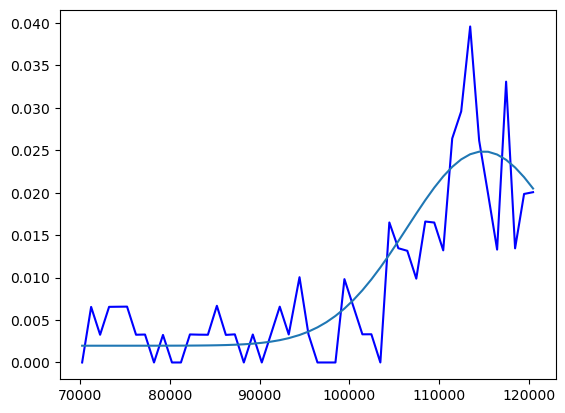

In [14]:
model3 = Const1D() + GaussCurve()
start_pars3 = [2,23,20000,115000]
loglike3 = GaussianLogLikelihood(band3_flare.time,band3_flare.counts,band3_flare.counts_err,model3)
parest3 = ParameterEstimation(fitmethod='BFGS', max_post=False)
res3 = parest3.fit(loglike3,start_pars3,scipy_optimize_options={'options':{'maxiter':100000,'gtol':1e-10,'disp':True}})
res3.mfit /= band3_flare.dt
print('Quiescent Rate: ',model3.parameters[0]/band3_flare.dt)
print('Eruption Height: ',model3.parameters[1]/band3_flare.dt)
print('Flare Duration (FWHM): ',model3.parameters[2])
print('Flare Peak Position: ',model3.parameters[3])
plt.plot(band3_flare.time,band3_flare.countrate,color='b')
plt.plot(band3_flare.time,res3.mfit)
plt.show()
